In [337]:
import pandas as pd

df = pd.read_csv('sales_data_with_discounts.csv')
print(df.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [338]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [339]:
df = pd.read_csv('sales_data_with_discounts.csv')


In [340]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_cols)

Numerical Columns:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [341]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_cols)



Numerical Columns:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [342]:
(df[numerical_cols].describe())

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [343]:
import matplotlib.pyplot as plt


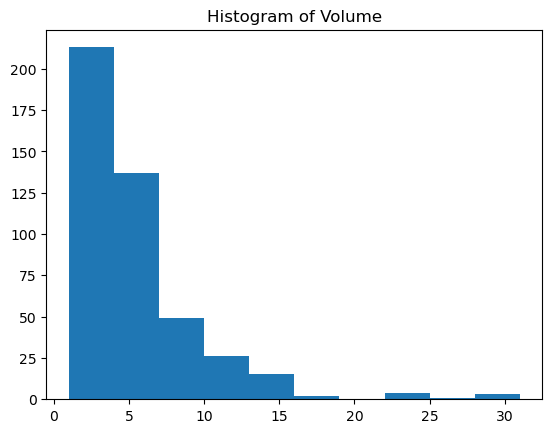

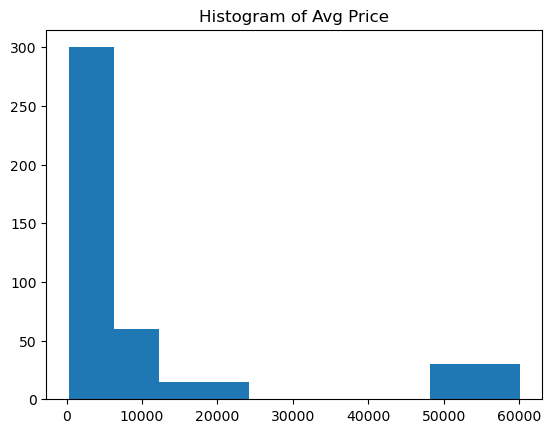

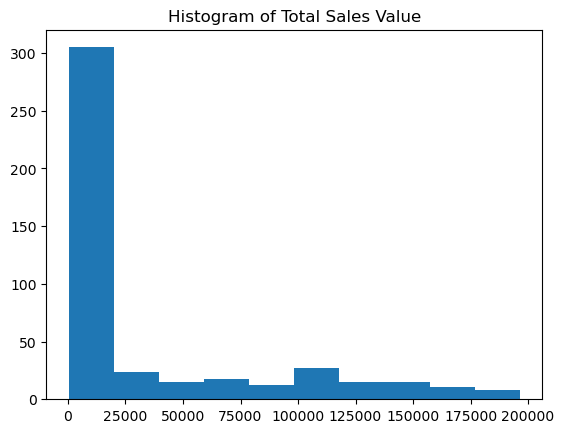

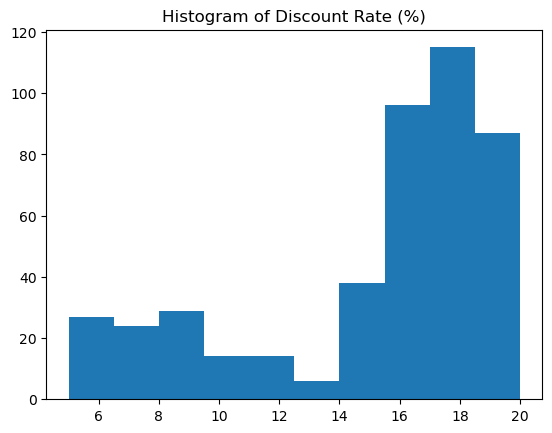

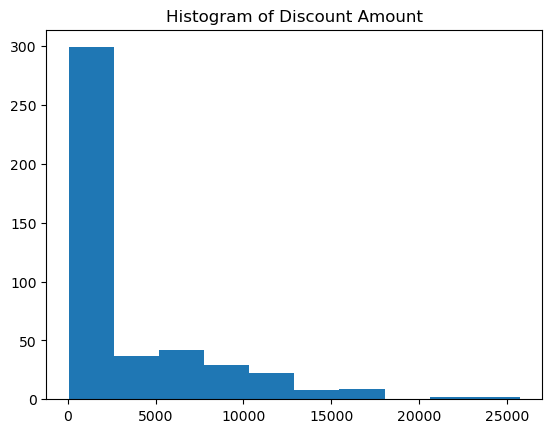

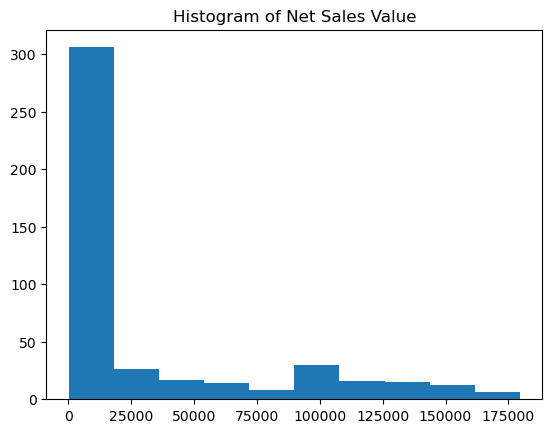

In [344]:
for col in numerical_cols:
    plt.hist(df[col], bins=10)
    plt.title(f"Histogram of {col}")
    plt.show()


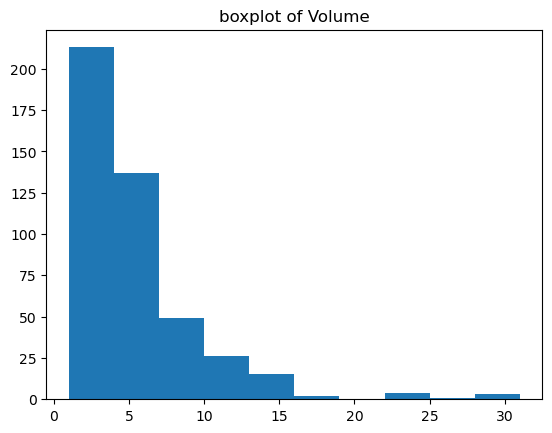

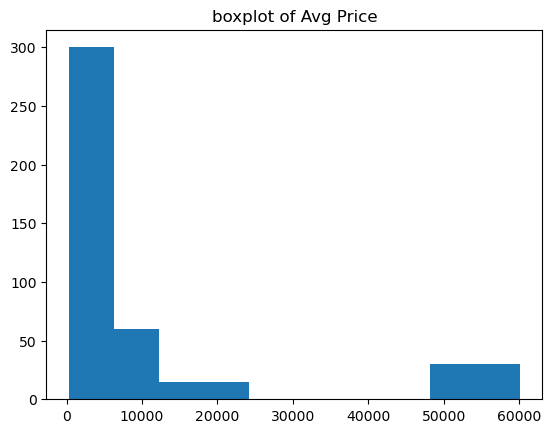

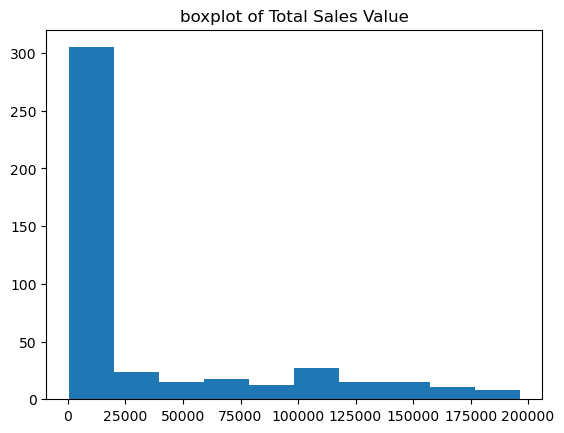

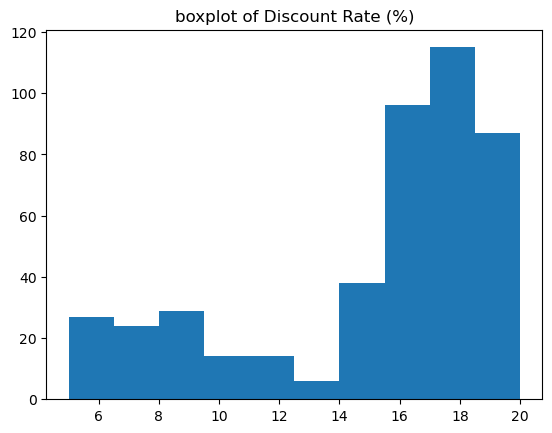

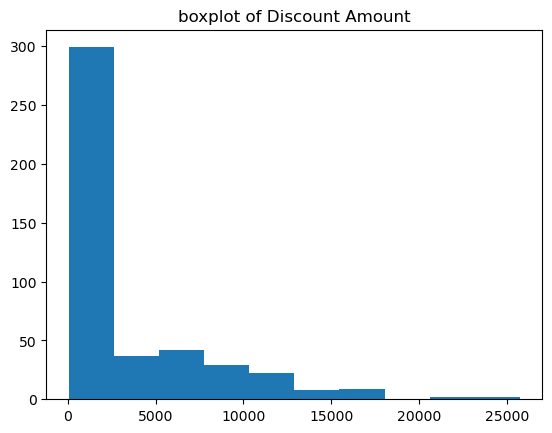

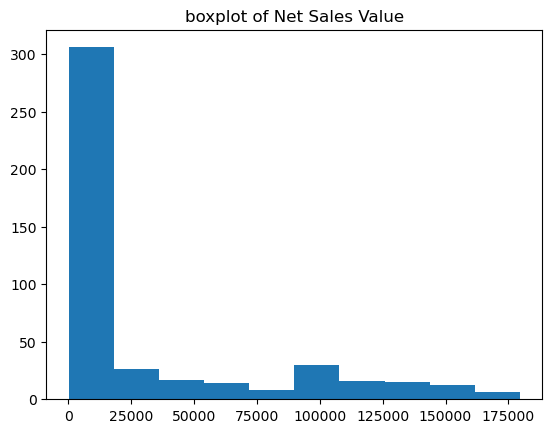

In [345]:
for col in numerical_cols:
    plt.hist(df[col], bins=10)
    plt.title(f"boxplot of {col}")
    plt.show()

In [346]:
corr_matrix=df[numerical_cols].corr()

In [347]:
print(corr_matrix)

                     Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
Volume             1.000000  -0.250878          -0.034789           0.157972   
Avg Price         -0.250878   1.000000           0.831978          -0.831582   
Total Sales Value -0.034789   0.831978           1.000000          -0.835431   
Discount Rate (%)  0.157972  -0.831582          -0.835431           1.000000   
Discount Amount    0.066297   0.676007           0.932410          -0.657607   
Net Sales Value   -0.044373   0.841166           0.999382          -0.846720   

                   Discount Amount  Net Sales Value  
Volume                    0.066297        -0.044373  
Avg Price                 0.676007         0.841166  
Total Sales Value         0.932410         0.999382  
Discount Rate (%)        -0.657607        -0.846720  
Discount Amount           1.000000         0.919127  
Net Sales Value           0.919127         1.000000  


In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

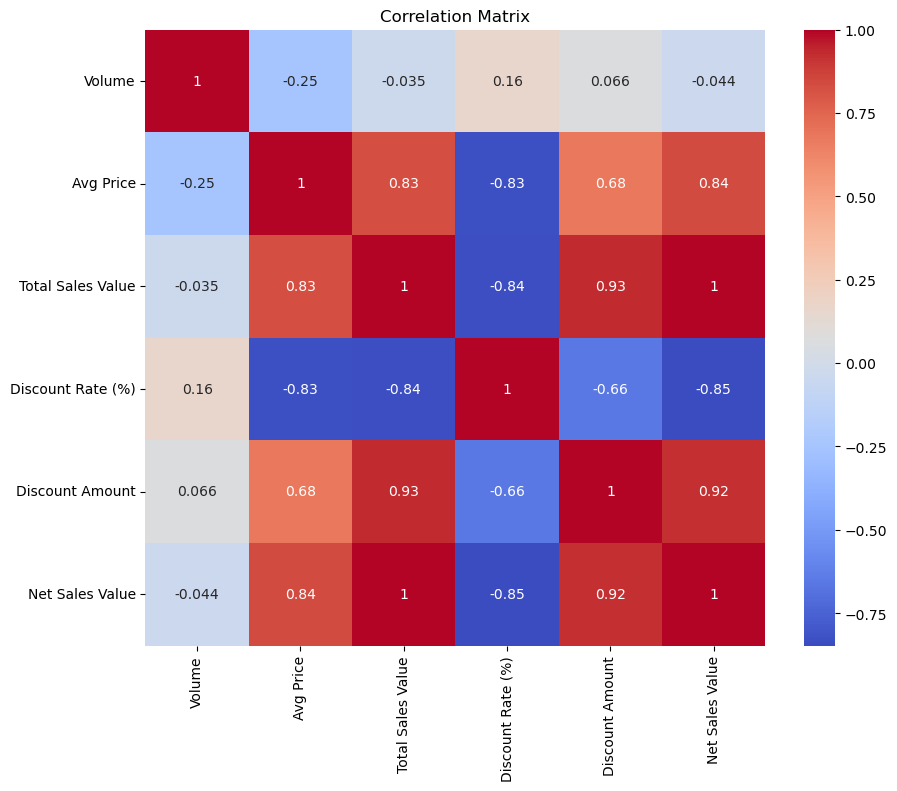

In [349]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [350]:
highly_correlated_cols = corr_matrix.unstack().sort_values(ascending=False)
highly_correlated_cols = highly_correlated_cols[highly_correlated_cols > 0.7]
print(highly_correlated_cols)



Volume             Volume               1.000000
Avg Price          Avg Price            1.000000
Discount Amount    Discount Amount      1.000000
Discount Rate (%)  Discount Rate (%)    1.000000
Total Sales Value  Total Sales Value    1.000000
Net Sales Value    Net Sales Value      1.000000
                   Total Sales Value    0.999382
Total Sales Value  Net Sales Value      0.999382
                   Discount Amount      0.932410
Discount Amount    Total Sales Value    0.932410
Net Sales Value    Discount Amount      0.919127
Discount Amount    Net Sales Value      0.919127
Avg Price          Net Sales Value      0.841166
Net Sales Value    Avg Price            0.841166
Avg Price          Total Sales Value    0.831978
Total Sales Value  Avg Price            0.831978
dtype: float64


In [351]:
cols_to_drop=[]

In [352]:
for col in numerical_cols:
    cols_to_drop.append(col)

In [353]:
df=df.drop(cols_to_drop,axis=1)

In [354]:
df.shape

(450, 7)

In [355]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [356]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [357]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

In [358]:
# Check if 'Date' column exists
if 'Date' in df.columns:
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    
    # Extract year, month, and day
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    
    # Drop the original 'Date' column
    df.drop('Date', axis=1, inplace=True)
else:
    print("The 'Date' column does not exist in the DataFrame.")


The 'Date' column does not exist in the DataFrame.


In [359]:
print(df.columns)

Index(['Day', 'SKU', 'City', 'BU', 'Brand', 'Model', 'year', 'month'], dtype='object')


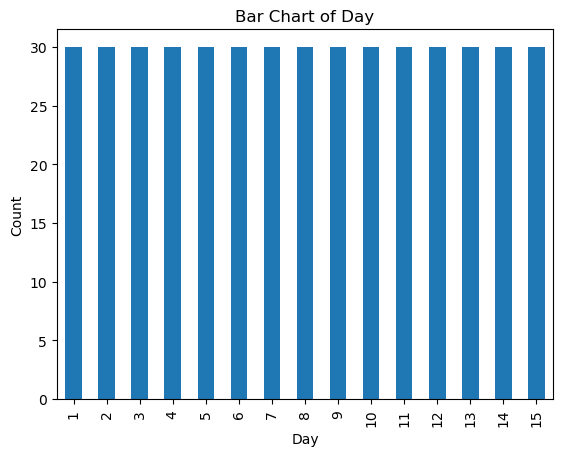

In [360]:
df['Day'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


In [ ]:
df['SKU'].value_counts().plot(kind='bar')
plt.title('Bar Chart of SKU')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.show()

In [ ]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

In [ ]:
# Calculate descriptive statistics
descriptive_stats = df[numerical_columns].describe()

print(descriptive_stats)


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns

In [ ]:
print(df.dtypes)

In [ ]:
# Analyze categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
for column in categorical_columns:
    print(f"value counts for {column}:")
    print(df[column].value_counts())
    print()

In [ ]:

import matplotlib.pyplot as plt

for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
import pandas as pd

# One-hot encode categorical variables
encoded_df = pd.get_dummies(df, columns=categorical_columns)

print(encoded_df.head())

In [ ]:
import pandas as pd

# One-hot encode categorical variables
encoded_df = pd.get_dummies(df, columns=categorical_columns)

print(encoded_df.head())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr_matrix = encoded_df.corr()

In [ ]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = encoded_df.drop('price', axis=1)
y = encoded_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = encoded_df.drop('actual_column_name', axis=1)
y = encoded_df['actual_column_name']
print(encoded_df.columns)

In [ ]:
print(encoded_df.columns)

In [ ]:
X = encoded_df.drop('SKU', axis=1)
y = encoded_df['SKU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
X = encoded_df.iloc[:, :-1]
y = encoded_df.iloc[:, -1]

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [363]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.9693864136601734e-31


In [365]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [366]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [367]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [368]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [369]:
# Train a LinearRegression model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [372]:
y_pred=model.predict(X_train_scaled)

In [374]:
# Evaluate the model's performance
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.352085755627863e-32


In [376]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_scaled)

mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

Best Parameters:  {'fit_intercept': True}
Best Score:  1.0
Mean Squared Error: 5.352085755627863e-32
